# Abalone Age Prediction

Sex / nominal / Male (M), Female (F), Infant (I) /

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / Perpendicular measurement to the length

Height / continuous / mm / The height of the abalone with all meat still in the shell

Whole weight / continuous / grams / The abalone’s entire weight

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / Gut Weight after bleeding the abalone.

Shell weight / continuous / grams / Weight of the shell after drying.

Rings / Integer / # of rings inside abalone shell

Age / Integer / directly mapped to number of rings inside shell + 1.5

# Importing Libraries/Data Cleaning/Data Quality

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#reading in data with pandas
data= pd.read_csv("snackpass_ds_onsite.csv")

#putting data into a pandas DataFrame
abalone = pd.DataFrame(data)

#dropping count column
abalone = abalone.drop("Unnamed: 0", axis = 1)

# Changing Length type from object to float
abalone['Length'] = pd.to_numeric(abalone['Length'],errors = 'coerce')
print(abalone.head())
print(abalone.dtypes)

  Sex  Length  Diameter  ...  Viscera.weight  Shell.weight  Rings
0   M   0.455     0.365  ...          0.1010         0.150     15
1   M   0.350     0.265  ...          0.0485         0.070      7
2   F   0.530     0.420  ...          0.1415         0.210      9
3   M   0.440     0.365  ...          0.1140         0.155     10
4   I   0.330     0.255  ...          0.0395         0.055      7

[5 rows x 9 columns]
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole.weight      float64
Shucked.weight    float64
Viscera.weight    float64
Shell.weight      float64
Rings               int64
dtype: object


In [2]:
# Null check
abalone.isnull().sum()
abalone = abalone.dropna()

In [3]:
#creating an age column w directly mapped eqn (Age = Rings + 1.5)
#and dropping rings column
abalone['Age'] = abalone['Rings'] + 1.5
abalone.describe()

# Height min is 0?
# Can remove those instances where abalone information wasn't recorded properly

,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings,Age
count,4172.000000,4172.000000,4172.000000,4172.000000,4172.000000,4172.000000,4172.000000,4172.000000,4172.000000
mean,0.524065,0.407948,0.139546,0.829089,0.359494,0.180690,0.238926,9.935762,11.435762
std,0.120070,0.099222,0.041832,0.490365,0.221945,0.109613,0.139202,3.225438,3.225438
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.442375,0.186500,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799750,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153250,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


In [4]:
abalone = abalone[abalone.Height != 0]
abalone.describe()

,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings,Age
count,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000
mean,0.524138,0.408007,0.139613,0.829352,0.359603,0.180749,0.238929,9.937170,11.437170
std,0.120046,0.099202,0.041730,0.490325,0.221936,0.109604,0.139211,3.225496,3.225496
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.442500,0.186500,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153750,0.502000,0.253000,0.328875,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


**Potential Data Quality Issue:**

The whole weight of the abalone should be a linear equation with the remaining weight variables. 

Whole weight = shucked weight + viscera weight + shell weight + unknown water and blood loss during shucking process (negligible).

The whole weight for any row should never be less than the sum of the other three weight columns. 


In [5]:
abalone['Weight_diff'] = abalone['Whole.weight'] - abalone['Shell.weight'] - abalone['Viscera.weight'] - abalone['Shucked.weight']
underQuestion = abalone['Weight_diff'] < 0
true_count = sum(underQuestion)
print(str(true_count) + " Rows where the shucked weight, viscera weight, and shell weight were greater than the whole weight")


156 Rows where the shucked weight, viscera weight, and shell weight were greater than the whole weight


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
abalone = abalone[abalone.Weight_diff >= 0]
abalone = abalone.drop('Weight_diff',axis = 1)
abalone.describe()

,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings,Age
count,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000
mean,0.527441,0.410615,0.140553,0.841552,0.363517,0.182652,0.241727,10.007972,11.507972
std,0.117855,0.097503,0.041385,0.488510,0.220680,0.109243,0.138645,3.222064,3.222064
min,0.110000,0.090000,0.015000,0.008000,0.002500,0.000500,0.003000,2.000000,3.500000
25%,0.455000,0.350000,0.115000,0.456000,0.191000,0.096000,0.134500,8.000000,9.500000
50%,0.545000,0.425000,0.145000,0.812000,0.341500,0.172500,0.236000,10.000000,11.500000
75%,0.615000,0.480000,0.165000,1.163250,0.506500,0.255500,0.330000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


In [7]:
abalone = abalone.drop('Rings', axis =1)

# Exploratory Data Analysis


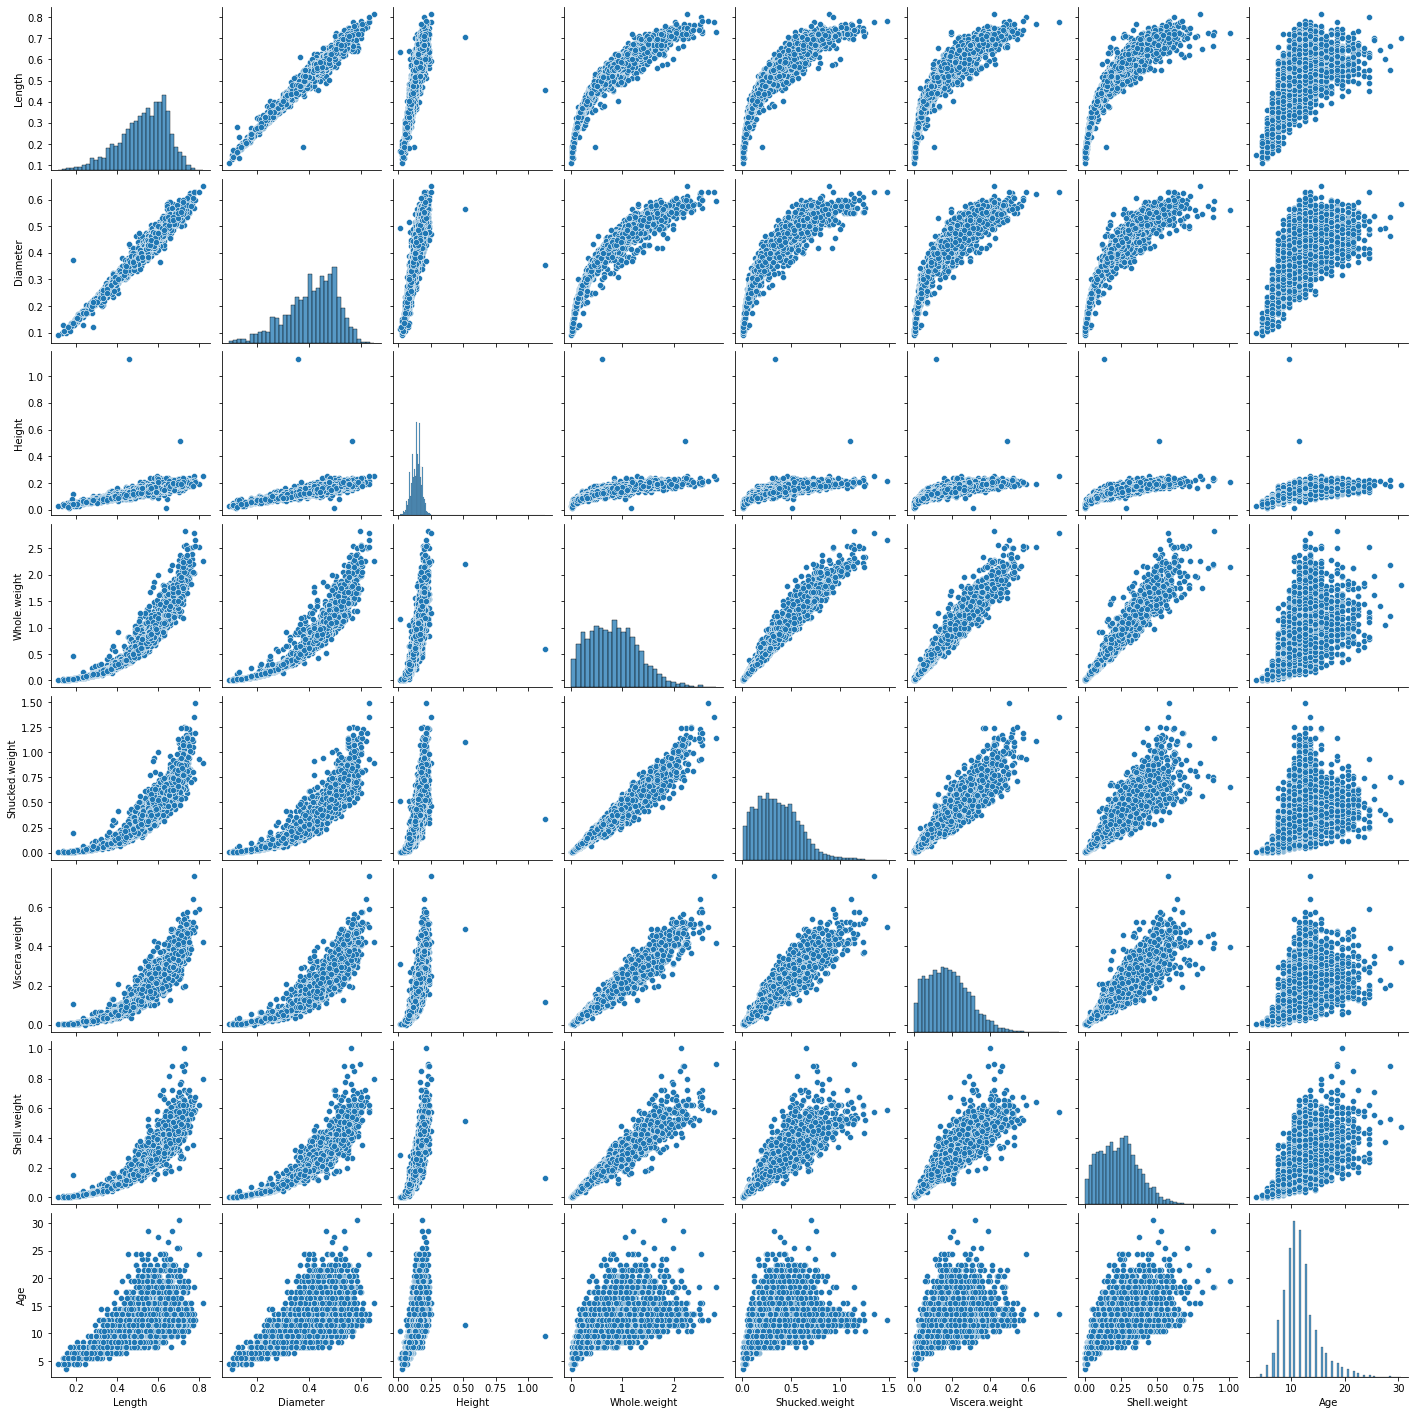

In [8]:
sns.pairplot(abalone)

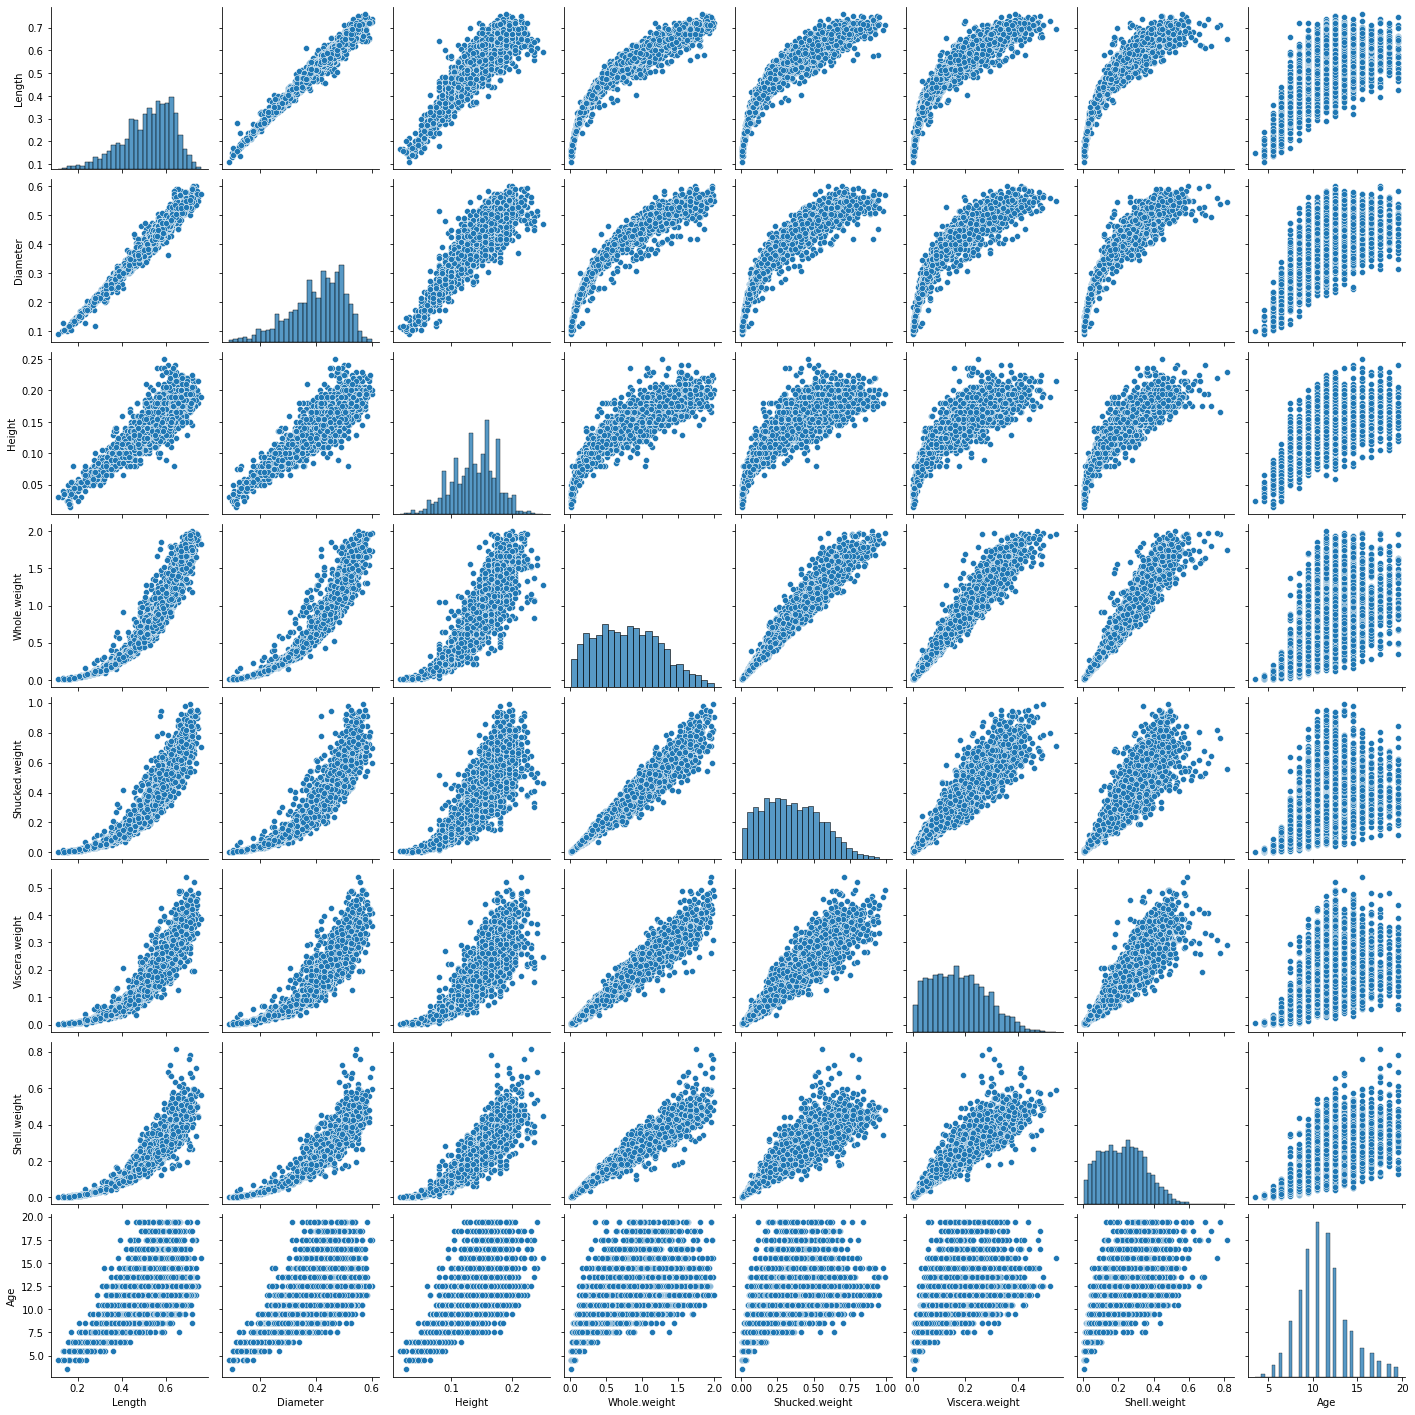

In [9]:
# Let's do some data trimming and retry that pairplot
abalone.drop(abalone[(abalone['Height'] > .4)].index, inplace = True)
abalone.drop(abalone[(abalone['Height'] <= .05) & (abalone['Age']>=10)].index, inplace = True)
abalone.drop(abalone[(abalone['Length'] < .4) & (abalone['Diameter']>.35)].index, inplace = True)
abalone.drop(abalone[(abalone['Length'] < .4) & (abalone['Diameter']>.35)].index, inplace = True)
abalone.drop(abalone[(abalone['Shucked.weight'] > 1) & (abalone['Age'] < 20)].index, inplace = True)
abalone.drop(abalone[(abalone['Age'] > 25)].index, inplace = True)
abalone.drop(abalone[(abalone['Shucked.weight'] < 1) & (abalone['Age'] > 23)].index, inplace = True)
abalone.drop(abalone[(abalone['Whole.weight'] > 2) & (abalone['Age'] < 20)].index, inplace = True)
abalone.drop(abalone[(abalone['Viscera.weight']<1) & (abalone['Age'] > 20)].index, inplace = True)

sns.pairplot(abalone)

In [10]:
numerical_features = abalone.select_dtypes(include = [np.number]).columns
categorical_features = abalone.select_dtypes(include = [np.object]).columns
print(numerical_features)
print(categorical_features)


Index(['Length', 'Diameter', 'Height', 'Whole.weight', 'Shucked.weight',
       'Viscera.weight', 'Shell.weight', 'Age'],
      dtype='object')
Index(['Sex'], dtype='object')


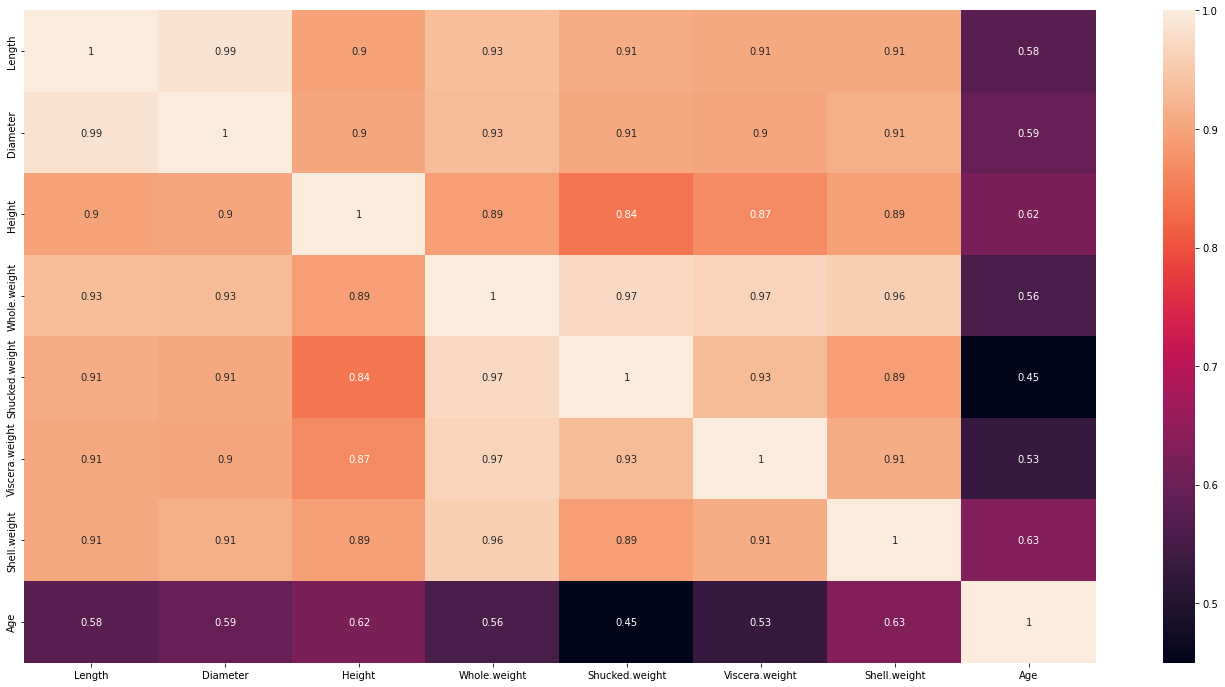

In [11]:
plt.figure(figsize=(24, 12))
sns.heatmap(abalone[numerical_features].corr(),annot = True)

From our heatmap, we can see that shell weight is the most correlated with Age. 
Shucked weight is the least correlated with Age.

Whole weight is VERY correlated with all of the provided columns without rings/age.

Height is the least correlated with all of the provided columns without rings/age




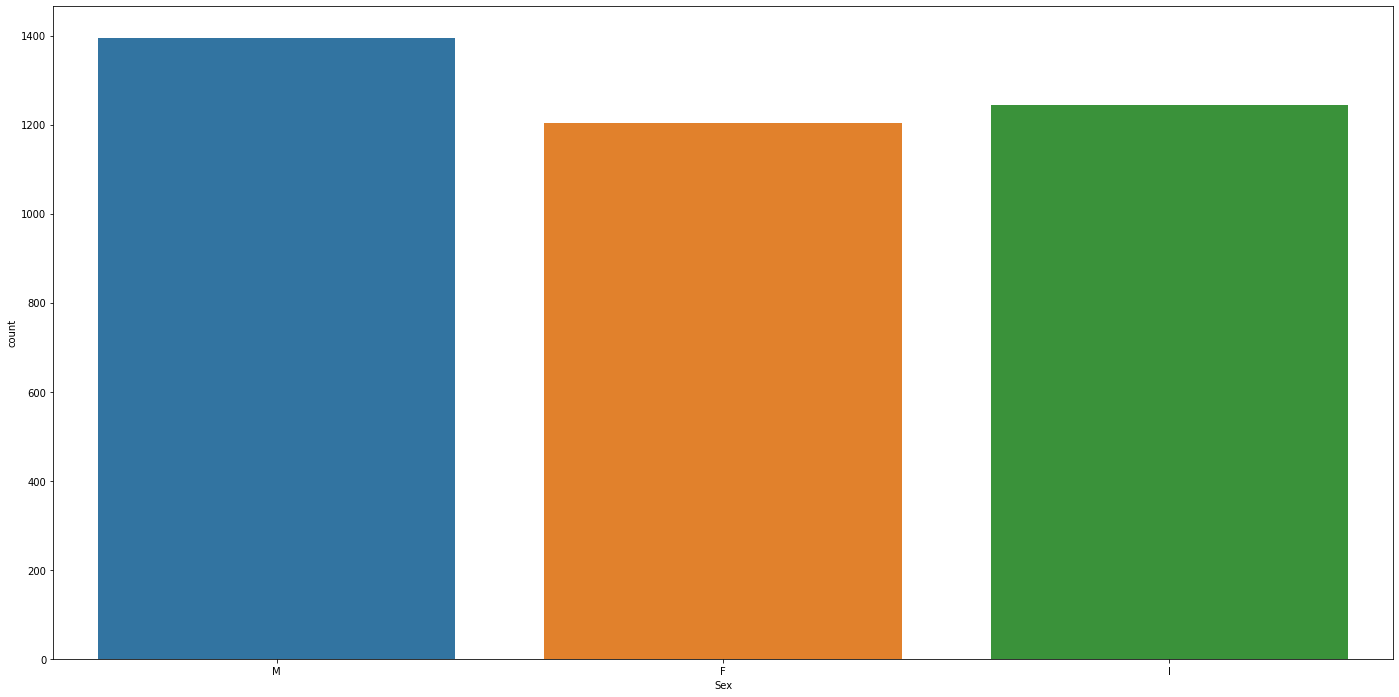

In [12]:
plt.figure(figsize = (24,12))
sns.countplot(x = 'Sex', data = abalone)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 46.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


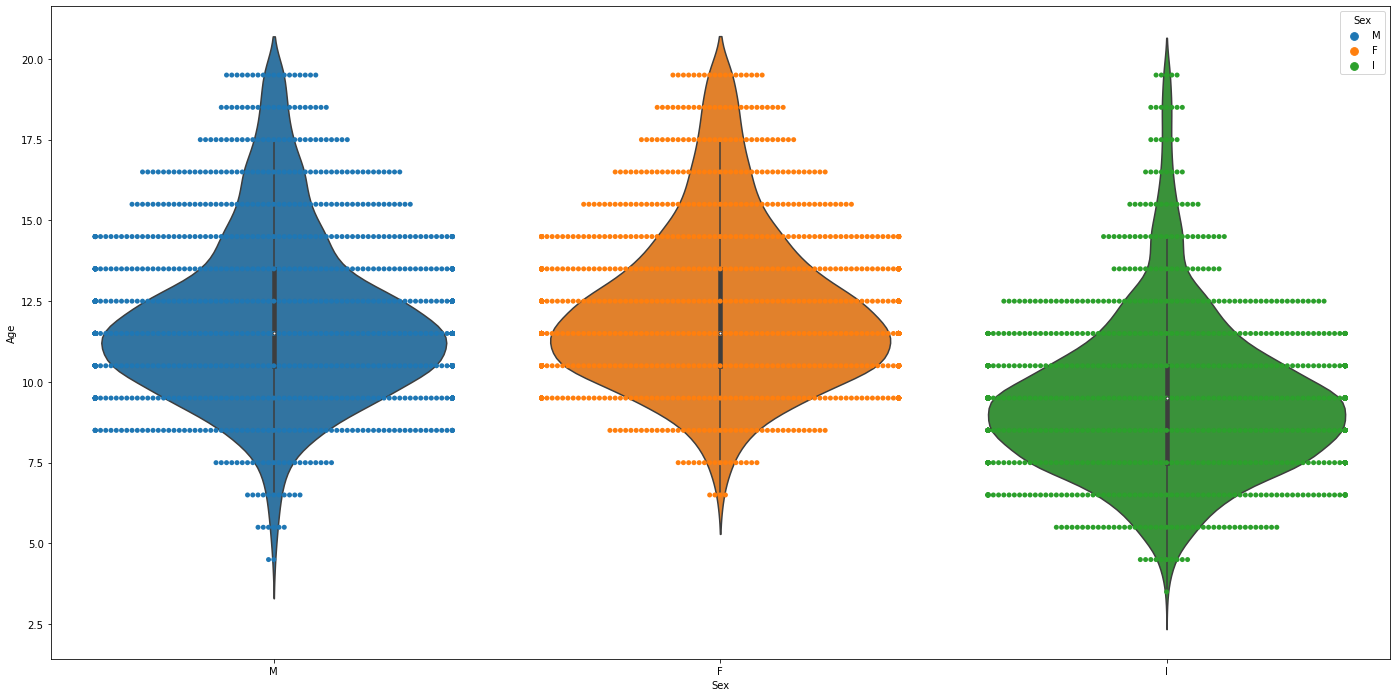

In [13]:
plt.figure(figsize = (24,12))
sns.swarmplot(x = 'Sex', y = 'Age', data = abalone, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Age', data = abalone)

Male: majority of male abalone are between 8 and 14 years old

Female: majority of female abalone are between 10 and 14 years old

Infant: majority of infant abalone are between 6 and 12 years old

This is an exceptionally large overlap for Infant ages to Male/Female ages. This will make our predictions less accurate.


---



In [14]:
#Lets make all the columns numeric variables by hot encoding Sex
Sex = abalone.pop('Sex')
 
abalone['M'] = (Sex == 'M')*1.0
abalone['F'] = (Sex == 'F')*1.0
abalone['I'] = (Sex == 'I')*1.0
abalone
abaloneCopy = abalone

# Predictive Modeling: Linear Regression Method

In [15]:
abalone = pd.get_dummies(abalone)
dummy_df = abalone

In [16]:
# ML packages to import
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score



In [17]:
#Data Preprocessing and Feature selection
X = abalone.drop('Age', axis = 1)
X = X.drop('F', axis = 1)
X = X.drop('M', axis = 1)
X = X.drop('I', axis = 1)

print(X)
y = abalone['Age']
print(y)

standardScale = StandardScaler()
standardScale.fit_transform(X)

selectkBest = SelectKBest(k=7)
X_new = selectkBest.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)

      Length  Diameter  Height  ...  Shucked.weight  Viscera.weight  Shell.weight
0      0.455     0.365   0.095  ...          0.2245          0.1010        0.1500
1      0.350     0.265   0.090  ...          0.0995          0.0485        0.0700
2      0.530     0.420   0.135  ...          0.2565          0.1415        0.2100
3      0.440     0.365   0.125  ...          0.2155          0.1140        0.1550
4      0.330     0.255   0.080  ...          0.0895          0.0395        0.0550
...      ...       ...     ...  ...             ...             ...           ...
4172   0.565     0.450   0.165  ...          0.3700          0.2390        0.2490
4173   0.590     0.440   0.135  ...          0.4390          0.2145        0.2605
4174   0.600     0.475   0.205  ...          0.5255          0.2875        0.3080
4175   0.625     0.485   0.150  ...          0.5310          0.2610        0.2960
4176   0.710     0.555   0.195  ...          0.9455          0.3765        0.4950

[3845 rows x 7 

In [18]:
linM = LinearRegression()
linM.fit(X_train, y_train)

y_train_pred = linM.predict(X_train)
y_test_pred = linM.predict(X_test)


s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set : %2f'%s)

p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set : %2f'%p)

Mean Squared error of training set : 3.636866
Mean Squared error of testing set : 3.751285


In [19]:

s = r2_score(y_train, y_train_pred)
print('R squared Score of training set: %.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R squared Score of testing set: %.2f'%p)

R squared Score of training set: 0.53
R squared Score of testing set: 0.52


Linear regression method returns a mean accuracy of about 52% on the given test data and labels

# Predictive Modeling: Ridge Method

In [20]:
from sklearn.linear_model import Ridge

ridge_mod = Ridge(alpha=0.01, normalize=True)
ridge_mod.fit(X_train, y_train)
ridge_mod.fit(X_test, y_test)
ridge_model_pred = ridge_mod.predict(X_test)
ridge_mod.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

0.5119676681877879

In [21]:
ridge_mod.score(X_test, y_test)

0.5180651950833014

Ridge regression method returns a mean accuracy of about 52% on the given test data and labels

Text(0, 0.5, 'Predictions')

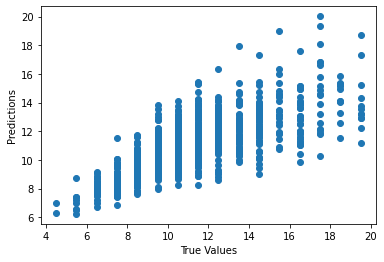

In [22]:
#@title
plt.scatter(y_test, ridge_model_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Predictive Modeling: K Neighbors Regression Method

In [23]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 4)
knn.fit(X_train, y_train)
knn.fit(X_test, y_test)

KNeighborsRegressor(n_neighbors=4)

In [24]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

knn.score(X_train, y_train)

0.48353721832263297

In [25]:
knn.score(X_test, y_test)

0.6705955858773252

K neighbors regression method returns a mean accuracy of 70% on the given test data and labels

# Predictive Modeling: Decision Tree Method

In [26]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0, max_depth = 5)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.5423046410103951
0.48989415533843494


Decision Tree Regression method returns a mean accuracy of about 48% on the given test data and labels with a max tree depth 4.

# Predictive Modeling: Neural Network

In [42]:
from tensorflow.keras import models, optimizers, losses, layers, callbacks
from sklearn.metrics import confusion_matrix
import random

In [44]:
abaloneCopy

,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,M,F,I,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1.0,0.0,0.0,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1.0,0.0,0.0,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0.0,1.0,0.0,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1.0,0.0,0.0,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0.0,0.0,1.0,8.5
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0.0,1.0,0.0,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1.0,0.0,0.0,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1.0,0.0,0.0,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0.0,1.0,0.0,11.5


I am going to encode the output columns to 'young' and 'adult' and take a look at the value counts across young and adult abalone.

In [46]:
def rings_label(x):
    if x<=10:
        return 'young'
    if x<=25:
        return 'adult'
    
abaloneCopy['Age'] = abaloneCopy['Age'].apply(rings_label)

In [53]:
abaloneCopy['Age'].value_counts()


adult    2534
young    1311
Name: Age, dtype: int64

In [55]:
# One hot encoding the sex attribute.
abaloneCopy_dummies = pd.get_dummies(abaloneCopy['Age'])

# Inserting dummy columns
for column in abaloneCopy_dummies.columns:
    abaloneCopy[column] = abaloneCopy_dummies[column]
    
# Dropping the original column
abaloneCopy = abaloneCopy.drop(columns = ['Age'])

abaloneCopy


,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,M,F,I,adult,young
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1.0,0.0,0.0,1,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1.0,0.0,0.0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0.0,1.0,0.0,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1.0,0.0,0.0,1,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0.0,0.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0.0,1.0,0.0,1,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1.0,0.0,0.0,1,0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1.0,0.0,0.0,1,0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0.0,1.0,0.0,1,0


In [57]:
input_columns = abaloneCopy.columns.tolist()
input_columns.remove('young')
input_columns.remove('adult')
output_columns = ['young', 'adult']
print("Number of input columns: ", len(input_columns))
print("Number of output columns: ", len(output_columns))

Number of input columns:  10
Number of output columns:  2


There are 10 input columns and 2 output columns. I am going to be using an 80–10–10 ratio to separate the dataframe into train - validation - test sets. The train_test_split function of the 
sklearn.model_selection module is used for this. These are then divided into X (input) and y (output)for more processing.

In [59]:
# Splitting into train, val and test set -- 80-10-10 split

# First, an 80-20 split
train_df, val_test_df = train_test_split(abaloneCopy, test_size = 0.2)

# Then split the 20% into half
val_df, test_df = train_test_split(val_test_df, test_size = 0.5)

print("Number of samples in...")
print("Training set: ", len(train_df))
print("Validation set: ", len(val_df))
print("Testing set: ", len(test_df))

Number of samples in...
Training set:  3076
Validation set:  384
Testing set:  385


In [60]:
# Splitting into X (input) and y (output)

Xtrain, ytrain = np.array(train_df[input_columns]), np.array(train_df[output_columns])

Xval, yval = np.array(val_df[input_columns]), np.array(val_df[output_columns])

Xtest, ytest = np.array(test_df[input_columns]), np.array(test_df[output_columns])

**Standardization**
The standard deviation of attribute values in the dataset is not the same across all of them. This may result in certain attributes being weighted higher than others. The values across all attributes are scaled to have mean = 0 and standard deviation = 1 with respect to the particular columns.
The StandardScaler function of the sklearn.preprocessing module is used to implement this concept. The instance is first fit on the training data and used to transform the train, validation, and test data.

In [61]:
ss = StandardScaler()

Xtrain = ss.fit_transform(Xtrain)
Xval = ss.transform(Xval)
Xtest = ss.transform(Xtest)

Implenting a 

In [65]:
model = models.Sequential([
    layers.Dense(32, activation = 'relu', input_shape = Xtrain[0].shape),
    layers.Dense(8, activation = 'relu'),
    layers.Dense(2, activation = 'softmax')
])

cb = callbacks.EarlyStopping(patience = 5, restore_best_weights = True)

In [66]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                352       
                                                                 
 dense_13 (Dense)            (None, 8)                 264       
                                                                 
 dense_14 (Dense)            (None, 2)                 18        
                                                                 
Total params: 634
Trainable params: 634
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(optimizer = optimizers.Adam(0.001), loss = losses.CategoricalCrossentropy(), metrics = ['accuracy'])

history = model.fit(Xtrain, ytrain, validation_data = (Xval, yval), epochs = 256, callbacks = cb)

Epoch 1/256
97/97 [==============================] - 1s 4ms/step - loss: 0.5964 - accuracy: 0.7116 - val_loss: 0.4611 - val_accuracy: 0.8099
Epoch 2/256
97/97 [==============================] - 0s 3ms/step - loss: 0.4086 - accuracy: 0.8267 - val_loss: 0.4002 - val_accuracy: 0.8177
Epoch 3/256
97/97 [==============================] - 0s 3ms/step - loss: 0.3839 - accuracy: 0.8303 - val_loss: 0.3929 - val_accuracy: 0.8281
Epoch 4/256
97/97 [==============================] - 0s 2ms/step - loss: 0.3773 - accuracy: 0.8332 - val_loss: 0.3886 - val_accuracy: 0.8203
Epoch 5/256
97/97 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8329 - val_loss: 0.3824 - val_accuracy: 0.8307
Epoch 6/256
97/97 [==============================] - 0s 2ms/step - loss: 0.3670 - accuracy: 0.8362 - val_loss: 0.3829 - val_accuracy: 0.8255
Epoch 7/256
97/97 [==============================] - 0s 2ms/step - loss: 0.3638 - accuracy: 0.8355 - val_loss: 0.3739 - val_accuracy: 0.8438
Epoch 8/256
9

In [68]:
model.evaluate(Xtest, ytest)

13/13 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.8416


[0.33125296235084534, 0.8415584564208984]

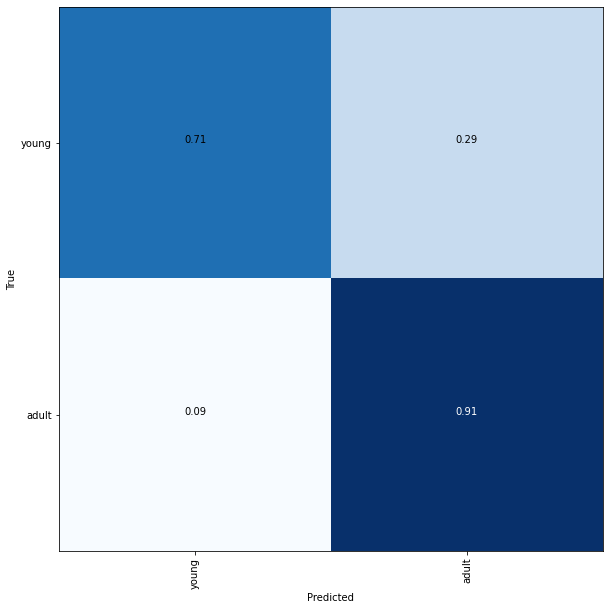

In [69]:
cm = confusion_matrix(np.argmax(ytest, axis = 1), (np.argmax(model.predict(Xtest), axis = 1)))
cm = cm.astype('int') / cm.sum(axis=1)[:, np.newaxis]

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)

for i in range(cm.shape[1]):
    for j in range(cm.shape[0]):
        if cm[i,j] > 0.8:
            clr = "white"
        else:
            clr = "black"
        ax.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color=clr)

_ = ax.imshow(cm, cmap=plt.cm.Blues)
ax.set_xticks(range(2))
ax.set_yticks(range(2))
ax.set_xticklabels(output_columns, rotation = 90)
ax.set_yticklabels(output_columns)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [70]:
def plot(history, variable, variable2):
    plt.plot(range(len(history[variable])), history[variable])
    plt.plot(range(len(history[variable2])), history[variable2])
    plt.legend([variable, variable2])
    plt.title(variable)

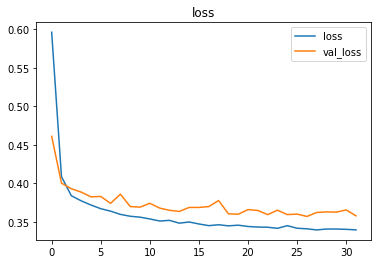

In [71]:
plot(history.history, "loss", "val_loss")

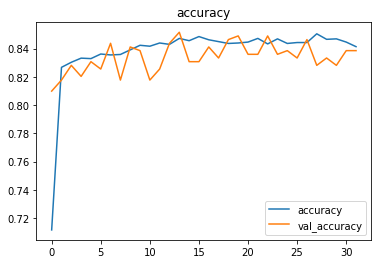

In [72]:
plot(history.history, "accuracy", "val_accuracy")

In [73]:
# pick random test data sample from one batch
x = random.randint(0, len(Xtest) - 1)

output = model.predict(Xtest[x].reshape(1, -1))[0]
print("Predicted: ", output_columns[np.argmax(output)])   
print("Probability: ", output[np.argmax(output)])

print("True: ", output_columns[np.argmax(ytest[x])])

Predicted:  young
Probability:  0.5079749
True:  adult
